In [40]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from keras.layers import Dropout
from keras.models import Model
from keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
import random

In [41]:
np.random.seed(0)

In [42]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()

In [43]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [44]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

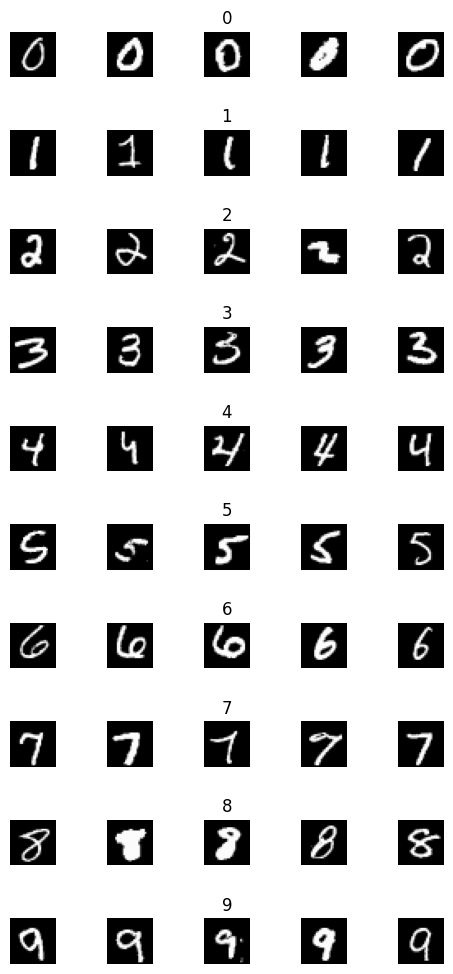

In [45]:
num_of_samples=[]

cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


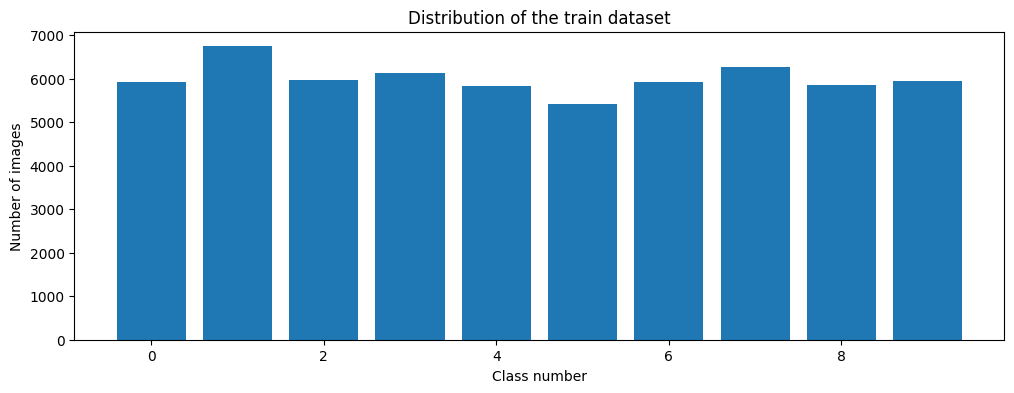

In [46]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [47]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [48]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [49]:
X_train = X_train/255
X_test = X_test/255

In [70]:
def leNet_model():
  model = Sequential()
  model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(15, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(Adam(learning_rate = 0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [71]:
model = leNet_model()
print(model.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 24, 24, 30)          │             780 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 12, 12, 30)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 10, 10, 15)          │           4,065 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 15)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 375)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 500)                 │         188,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           5,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 197,855 (772.87 KB)

 Trainable params: 197,855 (772.87 KB)

 Non-trainable params: 0 (0.00 B)

None


In [72]:
history=model.fit(X_train, y_train, epochs=10,  validation_split = 0.1, batch_size = 400, verbose = 1, shuffle = 1)

Epoch 1/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.8132 - loss: 0.5890 - val_accuracy: 0.9830 - val_loss: 0.0586
Epoch 2/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9758 - loss: 0.0788 - val_accuracy: 0.9855 - val_loss: 0.0530
Epoch 3/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.9827 - loss: 0.0574 - val_accuracy: 0.9885 - val_loss: 0.0403
Epoch 4/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.9864 - loss: 0.0432 - val_accuracy: 0.9865 - val_loss: 0.0453
Epoch 5/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.9840 - loss: 0.0475 - val_accuracy: 0.9882 - val_loss: 0.0439
Epoch 6/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.9858 - loss: 0.0431 - val_accuracy: 0.9898 - val_loss: 0.0445
Epoch 7/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.9879 - loss: 0.0394 - val_accuracy: 0.9913 - val_loss: 0.0371
Epoch 8/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.9874 - loss: 0.0405 - val_accu

Text(0.5, 0, 'epoch')

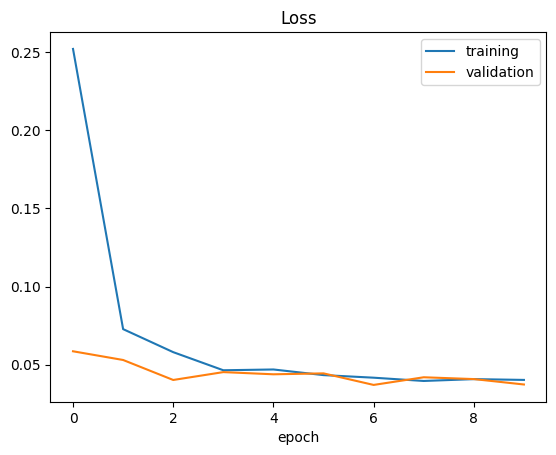

In [73]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

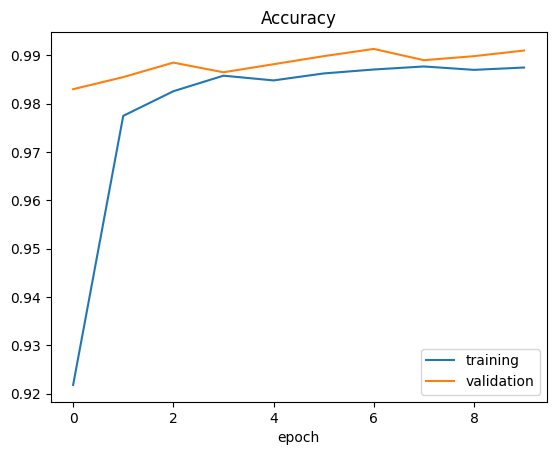

In [74]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

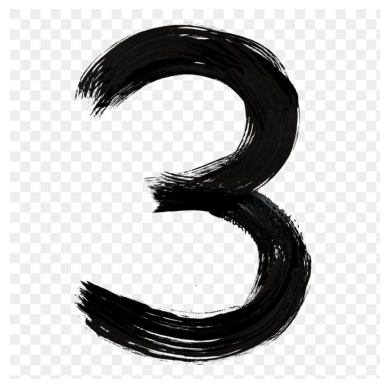

In [75]:
from PIL import Image
import matplotlib.pyplot as plt

image_path = "C:\\Users\\soura\\OneDrive\\Desktop\\93ea9cdc3923ae9d41091349b36cf17e.jpg"
img = Image.open(image_path)

plt.imshow(img, cmap='gray')
plt.axis('off')  
plt.show()

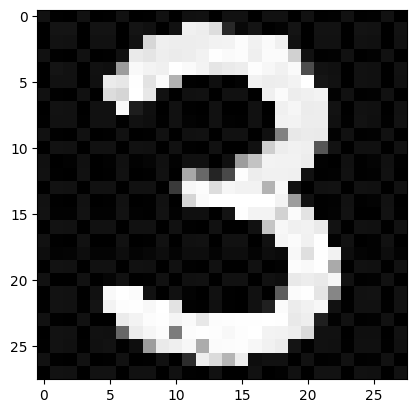

In [76]:
import cv2

img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [77]:
img = img / 255
img = img.reshape(1, 28,28,1)

In [78]:
prediction = np.argmax(model.predict(img), axis=-1)
print("predict digit:", str(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
predict digit: [3]


In [79]:
score = model.evaluate(X_test, y_test, verbose=0)

print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.02795468084514141
Test accuracy: 0.9915000200271606


In [80]:
layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)

visual_layer1, visual_layer2 = layer1.predict(img), layer2.predict(img)

print(visual_layer1.shape)
print(visual_layer2.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
(1, 24, 24, 30)
(1, 10, 10, 15)


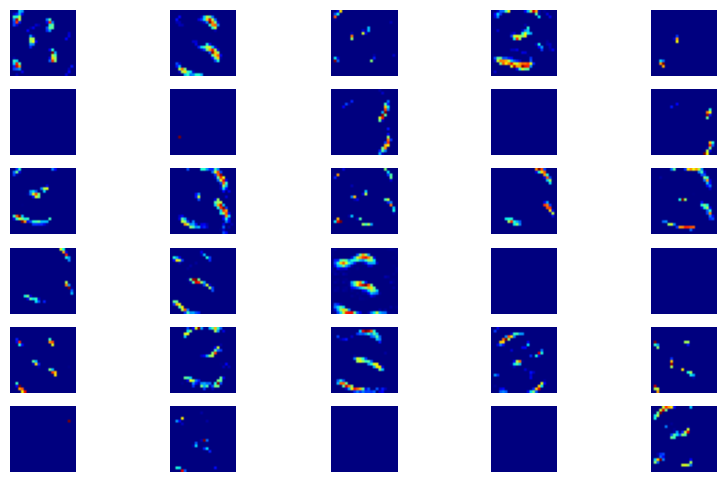

In [83]:
#layer 1
plt.figure(figsize=(10, 6))
for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.imshow(visual_layer1[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')

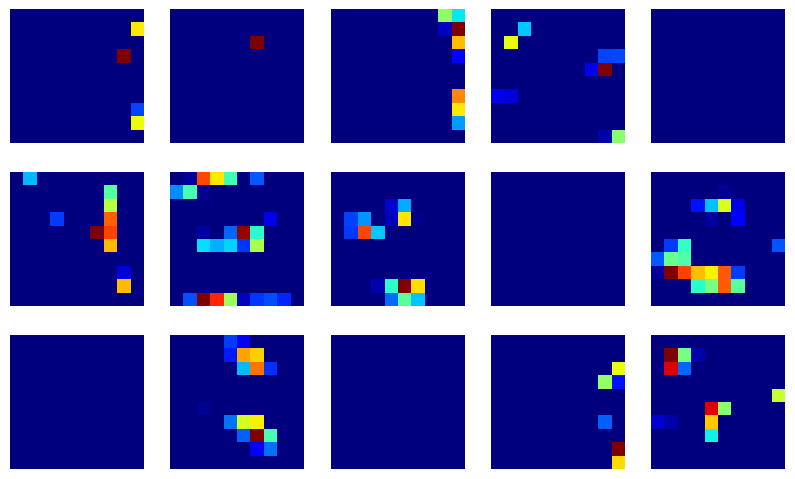

In [82]:
#layer 2
plt.figure(figsize=(10, 6))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(visual_layer2[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')